In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base de datos y limpieza

In [ ]:
df = pd.read_parquet("24o_medicom_con_materiales.parquet")

In [ ]:
df.head()

,fecha,material,id_cliente,ventas
0,2022-08-12,SOLUCION DX-10 C/1000ML FLX SI,513,-63.600000000
1,2021-02-06,IRRIGATEK 2 VIA P/BOLSA,513,195.700000000
2,2021-01-07,INOTROPISA 200MG/5ML C/5ML 5AMP SI,513,212.540000000
3,2023-07-27,BICARNAT 7.5% C/50ML 1FAMP SI,513,333.600000000
4,2023-03-14,BICARNAT 7.5% C/50ML 1FAMP SI,513,500.400000000


In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])

cutoff_date = '2021-01-01'

df = df[df['fecha'] >= cutoff_date]

In [ ]:
df.head()

,fecha,material,id_cliente,ventas
0,2022-08-12,SOLUCION DX-10 C/1000ML FLX SI,513,-63.600000000
1,2021-02-06,IRRIGATEK 2 VIA P/BOLSA,513,195.700000000
2,2021-01-07,INOTROPISA 200MG/5ML C/5ML 5AMP SI,513,212.540000000
3,2023-07-27,BICARNAT 7.5% C/50ML 1FAMP SI,513,333.600000000
4,2023-03-14,BICARNAT 7.5% C/50ML 1FAMP SI,513,500.400000000


In [ ]:
#df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228045 entries, 0 to 228044
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   fecha       228045 non-null  datetime64[ns]
 1   material    228045 non-null  object        
 2   id_cliente  228045 non-null  int64         
 3   ventas      228045 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.0+ MB


In [ ]:
counts = df["material"].value_counts()
non_unique_materials = counts[counts > 1].index
df= df[df["material"].isin(non_unique_materials)]
df["material"].info()

<class 'pandas.core.series.Series'>
Index: 227975 entries, 0 to 228044
Series name: material
Non-Null Count   Dtype 
--------------   ----- 
227975 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [ ]:
df.to_csv('output.csv', index=False)


#Datos por total de ventas

Id del material ordendo por el mayor número total de dinero obtenido

In [ ]:
setventas=df["material"].drop_duplicates()
setventas = setventas.reset_index(drop=True)
ventasporproducto=[]
for i in range (len(setventas)):
  ventasporproducto.append(df["ventas"][df["material"] == setventas[i]].values.sum())

ventastot = {
  "material": setventas,
  "ventas totales": ventasporproducto
}
ventastot=pd.DataFrame.from_dict(ventastot)
ventastot = ventastot.sort_values(by='ventas totales', ascending=False)
ventastot = ventastot.reset_index(drop=True)
ventastot.head(10)

,material,ventas totales
0,SOLUCION CS C/1000ML FLX SI,195885587.240000000
1,SOLUCION HT C/1000ML FLX SI,169560275.220000000
2,FLEBOTEK S/AGUJA,169325941.300000000
3,SOLUCION CS C/500ML 1FCO FLX SI,156464531.300000000
4,PISACAINA 2% 20MG/1ML C/50ML 1FAMP SI,154968753.860000000
5,SOLUCION CS C/250ML 1FCO PLAS SI T,91629821.980000000
6,SOLUCION HT C/500ML 1FCO FLX SI,88869180.980000000
7,SOLUCION CS C/100ML MINIOVAL SI,86580059.140000000
8,AGUA P/IRRIGA ESTERIL C/500ML 1FCO PLAS,56189493.560000000
9,OTROZOL 500 5MG/ML C/100ML FLX SI,55424222.480000000


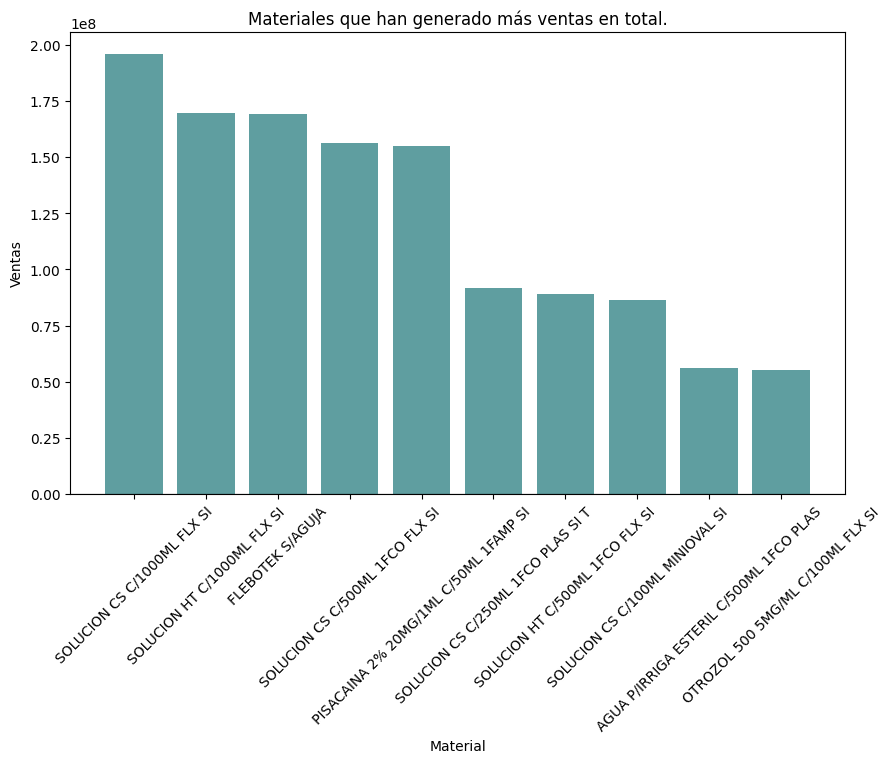

In [ ]:
top_10_ventas = ventastot.head(10)

# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(top_10_ventas['material'].astype(str), top_10_ventas['ventas totales'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado más ventas en total.')
plt.xlabel('Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

Id de los 10 materiales con menos dinero generado en total

In [ ]:
df['ventas'] = df['ventas']#.astype(object)
ventas_ordenadas_df = df.sort_values(by='ventas')[['material','fecha', 'ventas']]
ventas_ordenadas_df.head(10)
import pandas as pd
bottom_10_ventas = ventas_ordenadas_df.head(10)
bottom_10_ventas_df = pd.DataFrame(bottom_10_ventas)
bottom_10_ventas_df


,material,fecha,ventas
24561,MAGNEFUSIN 10% C/10ML 100AMPP SI TLJ,2022-03-11,-2299516.560000000
81998,AMK 500 MG INY 1 AMP 2 ML TLJ,2024-05-13,-1328822.000000000
99198,GLUCONATO CAL 10% C/10ML 100AMP SI NVO,2023-04-06,-1301616.000000000
81964,AMK 500MG/2ML C/1AMP SI,2021-03-10,-1251845.080000000
102259,KELEFUSIN 1.49G/5ML C/5ML 100AMP SI,2023-05-23,-1247043.600000000
24693,MAGNEFUSIN 10% C/10ML 100AMPP SI TLJ,2024-04-07,-1198890.000000000
82436,SOLUCION CS C/1000ML FLX SI,2021-03-10,-886200.000000000
81638,AMK 500 MG INY 1 AMP 2 ML TLJ,2024-01-25,-857970.680000000
81675,AMK 500 MG INY 1 AMP 2 ML TLJ,2024-08-02,-810084.000000000
81867,BEPLENOVAX C/500ML 1FCO SI,2021-03-10,-773625.600000000


In [ ]:
ventasbajas_ordenadas_df = ventas_ordenadas_df[ventas_ordenadas_df["ventas"] > 0]
ventasbajas = ventasbajas_ordenadas_df.head(10)
ventasbajas

,material,fecha,ventas
72384,PINADRINA 1MG/ML C/1ML 50AMP SI,2024-05-27,1.720000000
164663,ESPONJA GASA 7.5X5CM 12C T20X12 EST C/5,2022-03-18,7.840000000
206075,TAPON GIRATEK P/SITIO DE INYECCION,2021-10-14,7.960000000
205505,VEINCAT 22G CATETER PERIFERICO,2021-09-07,12.240000000
205529,VEINCAT 18G CATETER PERIFERICO,2021-09-07,12.350000000
126171,GIRATEK LLAVE DE 3VIAS,2021-01-28,12.390000000
205525,VEINCAT 24G CATETER PERIFERICO,2021-09-07,12.400000000
196469,"PENISODINA 800,000UI D/2ML C/1FAMP SUI",2021-10-06,15.160000000
126170,GIRATEK C/EXTENSION 80CM,2021-01-28,15.230000000
36380,FLEBOTEK MICROGOTERO EQ VENOCLISIS,2021-08-18,15.290000000


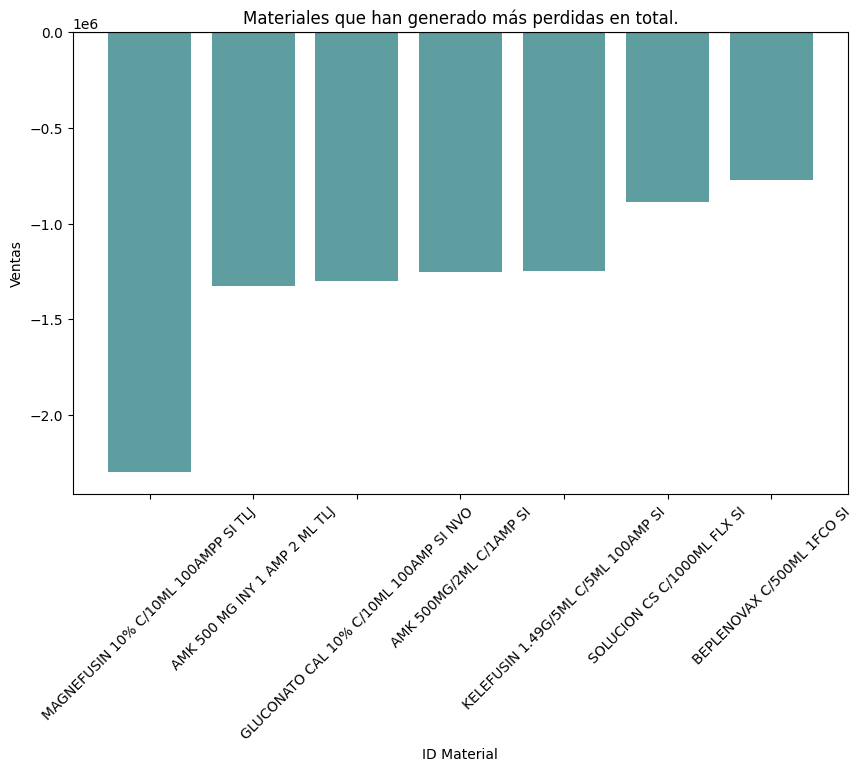

In [ ]:
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_ventas_df['material'].astype(str), bottom_10_ventas_df['ventas'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado más perdidas en total.')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

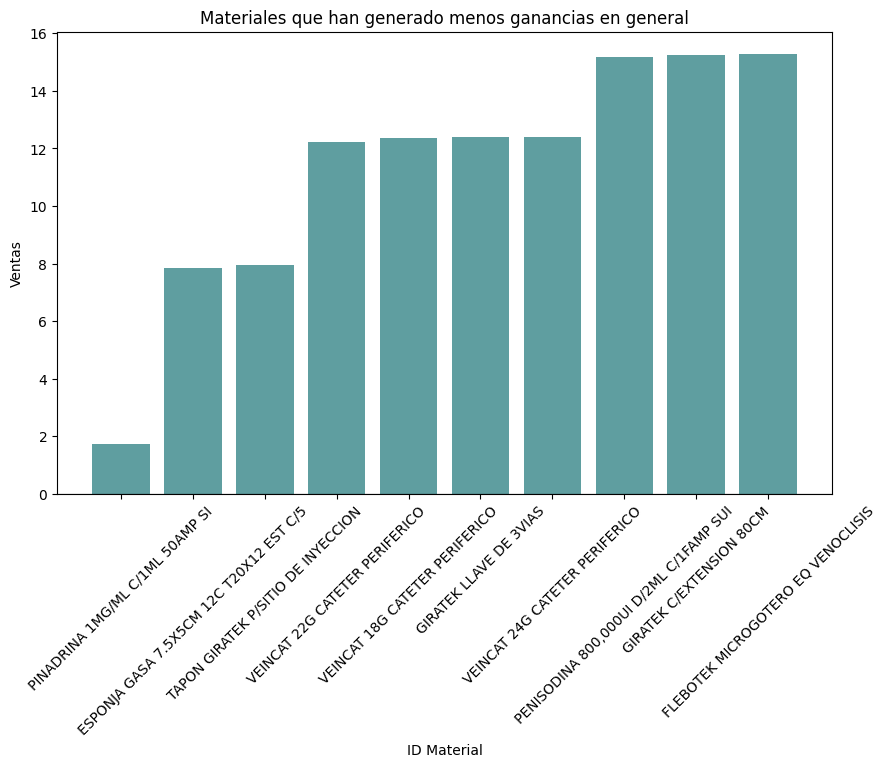

In [ ]:
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(ventasbajas['material'].astype(str), ventasbajas['ventas'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Materiales que han generado menos ganancias en general')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Añadir línea en y=0 para resaltar la separación entre el eje y los valores negativos
plt.axhline(0, color='black', linewidth=0.8)

# Mostrar gráfico
plt.show()

# Datos por ventas el 7 de Agosto de 2024

Id del material ordenado por el mayor número de dinero conseguido el 7 de Agosto de 2024

In [ ]:
fechas=df.sort_values(by='fecha', ascending=False)
fechas=fechas.reset_index(drop=True)
fechas.head(10)

,fecha,material,id_cliente,ventas
0,2024-08-07,SOLUCION DX-50 PiSA MINIOVAL 50ML NVO,7247,15220.000000000
1,2024-08-07,FLEBOTEK 0-100 BURETA 100ML EQ VENOCL,7299,1127.350000000
2,2024-08-07,SOLUCION DX-5 C/250ML 1FCO PLAS SI T,6627,436.800000000
3,2024-08-07,GIRATEK C/EXTENSION 50CM,2165,3700.000000000
4,2024-08-07,BUVACAINA 150MG/30ML C/30ML 1FAMP SI PI,2867,10120.000000000
5,2024-08-07,PISA BOLSA EVA 3000ML,2165,5160.000000000
6,2024-08-07,ENTEROBAG B BOLSA 1000ML P/BOMBA INF,7299,1302.560000000
7,2024-08-07,SOLUCION HT C/500ML 1FCO FLX SI,3035,6472.800000000
8,2024-08-07,FLEBOTEK QUIRURGICO NB EQ VENOCLISIS,7347,5104.000000000
9,2024-08-07,SOLUCION DX-10 C/500ML 1FCO FLX SI,7299,1294.560000000


In [ ]:
fechasgan=fechas[fechas["fecha"]=="2024-08-07"]
fechasgan=fechasgan.sort_values(by='ventas', ascending=False)
fechasgan=fechasgan.reset_index(drop=True)
fechasgan.head(10)

,fecha,material,id_cliente,ventas
0,2024-08-07,BUVACAINA PESADA 15MG/165MG C/2ML 5AMP,6681,58488.000000000
1,2024-08-07,SOLUCION HT C/1000ML FLX SI,2867,50976.000000000
2,2024-08-07,SALPIFAR 1G/100ML C/100ML 4FAMP SI,2867,34179.200000000
3,2024-08-07,SOLUCION HT C/1000ML FLX SI,3035,33984.000000000
4,2024-08-07,SOLUCION CS C/500ML 1FCO FLX SI,7299,31069.440000000
5,2024-08-07,IMATION 1G D/10ML C/1FAMP SI,2867,28162.400000000
6,2024-08-07,SOLUCION CS C/500ML 1FCO FLX SI,2867,25891.200000000
7,2024-08-07,SOLUCION CS 0.9% P/IRRIG 3000ML BOLSA SI,2867,25440.000000000
8,2024-08-07,FLUONING 750MG/150ML C/150ML FLX SI,7293,21920.800000000
9,2024-08-07,OXITOPISA 5UI C/1ML 50AMP SI,7267,21802.400000000


In [ ]:
fechasper=fechas[fechas["fecha"]=="2024-08-07"]
fechasper=fechasper.sort_values(by='ventas', ascending=True)
fechasper=fechasper.reset_index(drop=True)
fechasper.head(10)

,fecha,material,id_cliente,ventas
0,2024-08-07,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,513,125.750000000
1,2024-08-07,BUVACAINA 5MG/ML C/10ML 1AMP SI,7293,258.000000000
2,2024-08-07,PENDIBEN COMP 1.2MU D/5ML C/FAMP SUI,1923,384.600000000
3,2024-08-07,ELECTROLIT MANZANA C/625ML FCO PLAS SOOR,3035,426.240000000
4,2024-08-07,SOLUCION DX-5 C/250ML 1FCO PLAS SI T,6627,436.800000000
5,2024-08-07,"PENISODINA 400,000UI D/2ML 1FAMP SUI TLJ",6605,442.400000000
6,2024-08-07,TAPON GIRATEK P/SITIO DE INYECCION,3035,445.500000000
7,2024-08-07,"PENISODINA 800,000UI D/2ML 1FAMP SUI TLJ",6605,465.800000000
8,2024-08-07,BUVACAINA 5MG/ML C/10ML 1AMP SI,3035,516.000000000
9,2024-08-07,EXSEPT 50% SOL ANTISEP 500ML,2867,531.350000000


In [ ]:
fechasmen = fechasper[fechasper["ventas"] > 0]
fechasmen.head(10)

,fecha,material,id_cliente,ventas
0,2024-08-07,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,513,125.750000000
1,2024-08-07,BUVACAINA 5MG/ML C/10ML 1AMP SI,7293,258.000000000
2,2024-08-07,PENDIBEN COMP 1.2MU D/5ML C/FAMP SUI,1923,384.600000000
3,2024-08-07,ELECTROLIT MANZANA C/625ML FCO PLAS SOOR,3035,426.240000000
4,2024-08-07,SOLUCION DX-5 C/250ML 1FCO PLAS SI T,6627,436.800000000
5,2024-08-07,"PENISODINA 400,000UI D/2ML 1FAMP SUI TLJ",6605,442.400000000
6,2024-08-07,TAPON GIRATEK P/SITIO DE INYECCION,3035,445.500000000
7,2024-08-07,"PENISODINA 800,000UI D/2ML 1FAMP SUI TLJ",6605,465.800000000
8,2024-08-07,BUVACAINA 5MG/ML C/10ML 1AMP SI,3035,516.000000000
9,2024-08-07,EXSEPT 50% SOL ANTISEP 500ML,2867,531.350000000


# Datos por ventas en fecha más reciente

Id de los 10 materiales con más ganancias generadas en ventas recientes

In [ ]:

ventasporproductoN=[]
fechareciente=[]
for i in range (len(setventas)):
  ventanueva=fechas[fechas["material"] == setventas[i]].index.min()
  ventasporproductoN.append(fechas["ventas"][ventanueva])
  fechareciente.append(fechas["fecha"][ventanueva])


ventastotN = {
  "material": setventas,
  "fecha más reciente de activación": fechareciente,
  "ventas en fecha más reciente": ventasporproductoN
}
ventastotN=pd.DataFrame.from_dict(ventastotN)
ventastotN = ventastotN.sort_values(by='ventas en fecha más reciente', ascending=False)
ventastotN = ventastotN.reset_index(drop=True)
ventastotN.head(10)

,material,fecha más reciente de activación,ventas en fecha más reciente
0,FENODID 0.5MG/10ML C/6AMP SI PI,2024-07-27,197800.000000000
1,LEVAMIN PAD 10% C/500ML 1FCO SI,2022-08-05,193156.800000000
2,RECOFOL 10MG/ML C/100ML 1FCO NVO,2024-07-26,164510.000000000
3,TENDRIN 50MG/2ML C/2ML 10AMP SI,2024-06-21,101920.000000000
4,SOLUCION HM PISA 1:34 C/P 208L,2024-07-09,91416.060000000
5,RELACUM 15MG/3ML C/5AMP SI,2024-06-21,86708.000000000
6,ISAVIR 400MG C/35TAB,2021-04-24,78112.350000000
7,RECOFOL 200MG/20ML C/5AMP EMINY NVO,2024-06-13,65946.320000000
8,FERROIN 100MG/2ML C/3AMP SI,2024-07-31,65436.000000000
9,LUFCUREN 50MG/5ML C/5ML 12FAMP SI,2024-08-03,62150.600000000


Id de los 10 materiales con más perdidas generadas en ventas recientes

In [ ]:

ventasporproductoN=[]
fechareciente=[]
for i in range (len(setventas)):
  ventanueva=fechas[fechas["material"] == setventas[i]].index.min()
  ventasporproductoN.append(fechas["ventas"][ventanueva])
  fechareciente.append(fechas["fecha"][ventanueva])


ventastotN = {
  "material": setventas,
  "fecha más reciente de activación": fechareciente,
  "ventas en fecha más reciente": ventasporproductoN
}
ventastotN=pd.DataFrame.from_dict(ventastotN)
ventastotNPer = ventastotN.sort_values(by='ventas en fecha más reciente', ascending=True)
ventastotNPer = ventastotNPer.reset_index(drop=True)
ventastotNPer.head(10)

,material,fecha más reciente de activación,ventas en fecha más reciente
0,CLORHEXI-RUB 0.5% DESECHABLE C/750ML,2021-09-27,-181256.000000000
1,EXETIN-A 2000UI D/1ML C/6FAMP SI,2024-08-02,-24855.000000000
2,UNIFORME QX UNITALLA DESECH AZUL,2021-07-03,-17971.500000000
3,BENSITRAK 2MG/ML C/5ML 1AMP SI,2023-09-15,-16185.000000000
4,SOLUCION DX-CS C/1000ML 1FCO SI,2022-09-02,-15717.600000000
5,SOL CS MINIVAL 100ML SI C/ADAP VIAL,2024-05-21,-15688.000000000
6,"PENISODINA 800,000UI D/2ML C/1FAMP SUI",2022-06-22,-12928.000000000
7,EQUIPO INFUSOMAT SPACE ESTANDAR NVO,2021-06-04,-7680.000000000
8,ANTIVON 4MG/2ML C/2ML 1AMP SI,2024-08-01,-7440.780000000
9,PISATEK BIOSAFE 2 VIAS,2021-04-26,-7290.000000000


Id de los 10 materiales con menos ganancias generadas en ventas recientes

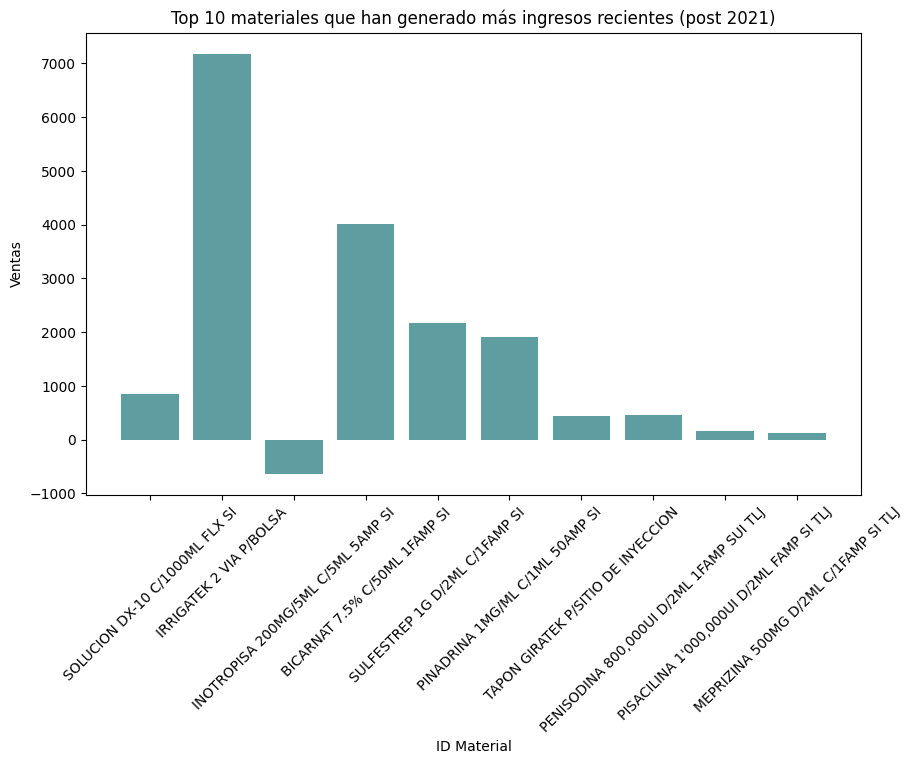

In [ ]:
import pandas as pd
md = ventastotN.head(10)
dfmd = pd.DataFrame(md)
dfmd
# Ajuste del gráfico para una mejor visualización
plt.figure(figsize=(10, 6))
plt.bar(dfmd['material'].astype(str), dfmd['ventas en fecha más reciente'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Top 10 materiales que han generado más ingresos recientes (post 2021)')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

In [ ]:
ventastotNMen = ventastotNPer[ventastotNPer["ventas en fecha más reciente"] > 0]
ventastotNMen = ventastotNMen.reset_index(drop=True)
ventastotNMen.head(10)

,material,fecha más reciente de activación,ventas en fecha más reciente
0,ELECTROLIT PED MANZANA C/500ML 1FCO SOOR,2022-07-12,81.920000000
1,ELECTROLIT PED UVA C/500ML FCO PLAS SOOR,2022-08-23,81.920000000
2,COMPRESA 15X15CM BLISTER C/5,2022-05-10,87.980000000
3,CLORHEXI-CLEAN 0.12% C/30ML SPRAY,2022-07-18,115.230000000
4,FLEBOTEK P/MEDIR PVC,2024-07-24,121.790000000
5,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,2024-08-07,125.750000000
6,HEMOTEK LUERLOCK C/FILTRO S/AGUJA EQ VEN,2023-06-05,126.000000000
7,COMPRESA VIENTRE 45X70CM T28X24 EST C/2,2024-07-11,131.860000000
8,EXSEPT 100% C/250ML,2023-03-25,134.400000000
9,"PISACILINA 1'000,000UI D/2ML FAMP SI TLJ",2024-07-31,159.410000000


# Datos por ventas después de 2023

Productos con mejores totales con fecha de activacion reciente (Después de 2023)

In [ ]:
ventastotN['fecha más reciente de activación'] = pd.to_datetime(ventastotN['fecha más reciente de activación'])

productos_nuevos = ventastotN[ventastotN['fecha más reciente de activación'] >= pd.to_datetime('2023-01-01')]
productos_nuevos = productos_nuevos.sort_values(by='ventas en fecha más reciente', ascending=False)
productos_nuevos.reset_index(drop=True)
top_productos_nuevos = productos_nuevos.head(10)

top_productos_nuevos

,material,fecha más reciente de activación,ventas en fecha más reciente
394,FENODID 0.5MG/10ML C/6AMP SI PI,2024-07-27,197800.000000000
530,RECOFOL 10MG/ML C/100ML 1FCO NVO,2024-07-26,164510.000000000
328,TENDRIN 50MG/2ML C/2ML 10AMP SI,2024-06-21,101920.000000000
503,SOLUCION HM PISA 1:34 C/P 208L,2024-07-09,91416.060000000
332,RELACUM 15MG/3ML C/5AMP SI,2024-06-21,86708.000000000
422,RECOFOL 200MG/20ML C/5AMP EMINY NVO,2024-06-13,65946.320000000
265,FERROIN 100MG/2ML C/3AMP SI,2024-07-31,65436.000000000
346,LUFCUREN 50MG/5ML C/5ML 12FAMP SI,2024-08-03,62150.600000000
237,BUVACAINA PESADA 15MG/165MG C/2ML 5AMP,2024-08-07,58488.000000000
525,MEROPENEM 1G C/1FAMP SI STD,2024-06-05,55751.320000000


Productos con mayores pérdidas con fecha de activacion reciente (Después de 2023)

In [ ]:
productos_nuevosper = productos_nuevos.sort_values(by='ventas en fecha más reciente', ascending=True)
top_productos_nuevosper = productos_nuevosper.head(10)

top_productos_nuevosper

,material,fecha más reciente de activación,ventas en fecha más reciente
340,EXETIN-A 2000UI D/1ML C/6FAMP SI,2024-08-02,-24855.000000000
292,BENSITRAK 2MG/ML C/5ML 1AMP SI,2023-09-15,-16185.000000000
203,SOL CS MINIVAL 100ML SI C/ADAP VIAL,2024-05-21,-15688.000000000
267,ANTIVON 4MG/2ML C/2ML 1AMP SI,2024-08-01,-7440.780000000
115,FLEBOTEK QUIRURGICO CON CLAVE,2024-08-02,-6052.000000000
122,LIPOFUNDIN MCT/LCT 10% C/500ML 1FCO SI,2023-12-05,-5871.600000000
421,RECOFOL 20MG/ML C/50ML 1FCO NVO,2023-04-26,-4636.260000000
589,CAPIN BH 10MG C/10TAB,2024-08-02,-4401.000000000
516,AGUA P/IRRIG C/3000ML 1FCO PLAS SI,2023-11-09,-4351.200000000
127,BOLENTAX 60MG/0.6ML C/2JGA SISC,2024-08-02,-3655.850000000


Productos con menores ventas con fecha de activacion reciente (Después de 2023)

In [ ]:
productos_nuevosmen= productos_nuevosper[productos_nuevosper["ventas en fecha más reciente"] > 0]
productos_nuevosmen.head()

,material,fecha más reciente de activación,ventas en fecha más reciente
202,FLEBOTEK P/MEDIR PVC,2024-07-24,121.790000000
9,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,2024-08-07,125.750000000
155,HEMOTEK LUERLOCK C/FILTRO S/AGUJA EQ VEN,2023-06-05,126.000000000
338,COMPRESA VIENTRE 45X70CM T28X24 EST C/2,2024-07-11,131.860000000
554,EXSEPT 100% C/250ML,2023-03-25,134.400000000


#Datos por ventas antes de 2022

Productos con última venta previa a 2022 con mayores ingresos generados

In [ ]:
ventastotN['fecha más reciente de activación'] = pd.to_datetime(ventastotN['fecha más reciente de activación'])
productos_antiguos = ventastotN[ventastotN['fecha más reciente de activación'] < pd.to_datetime('2022-01-01')]

productos_antiguos = productos_antiguos.sort_values(by='ventas en fecha más reciente', ascending=False)
top_productos_antiguos = productos_antiguos.head(10)

top_productos_antiguos

,material,fecha más reciente de activación,ventas en fecha más reciente
476,ISAVIR 400MG C/35TAB,2021-04-24,78112.350000000
578,XERENDIP 16UI D/1ML C/CART LIOF SI NVAIM,2021-03-12,54613.200000000
341,KIT QX PAQUETE QX P/ORTOPEDIA,2021-10-01,28595.520000000
583,CENOZOIC 4MG/5ML C/1FAMP SI,2021-12-26,25958.400000000
512,ANTIVON 8MG/4ML C/4ML 3AMP SI,2021-02-16,18908.000000000
216,MALIPAFED 2.5MG/ML C/5ML 1FAMP SI,2021-12-10,17472.000000000
348,ANTIVON 8MG/4ML C/4ML 1AMP SI,2021-11-04,10400.000000000
315,DINITRATO ISOSORBIDA 1MG/ML C/100ML SI,2021-02-17,8026.200000000
469,AMFOTERICINA B 50MG C/1FAMP SI,2021-08-17,7836.400000000
545,PISAPEM 1G D/20ML C/1FAMP SI,2021-02-20,6780.800000000


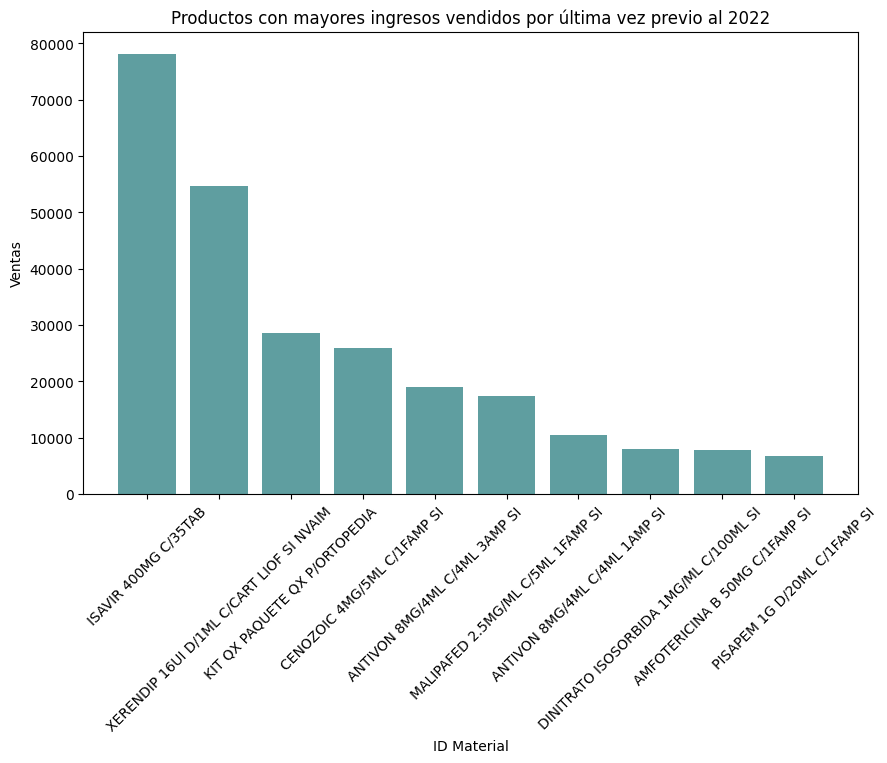

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_productos_antiguos['material'].astype(str), top_productos_antiguos['ventas en fecha más reciente'], color='cadetblue')

# Añadir título y etiquetas de ejes
plt.title('Productos con mayores ingresos vendidos por última vez previo al 2022')
plt.xlabel('ID Material')
plt.ylabel('Ventas')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Productos con última venta previa a 2022 con mayores pérdidas

In [ ]:
productos_antiguosPer = productos_antiguos.sort_values(by='ventas en fecha más reciente', ascending=True)
top_productos_antiguosPer = productos_antiguosPer.head(10)

top_productos_antiguosPer

,material,fecha más reciente de activación,ventas en fecha más reciente
378,CLORHEXI-RUB 0.5% DESECHABLE C/750ML,2021-09-27,-181256.000000000
365,UNIFORME QX UNITALLA DESECH AZUL,2021-07-03,-17971.500000000
579,EQUIPO INFUSOMAT SPACE ESTANDAR NVO,2021-06-04,-7680.000000000
528,PISATEK BIOSAFE 2 VIAS,2021-04-26,-7290.000000000
548,PROPORT 5.8FR B PERF INTR 6FR POLIUR,2021-03-05,-4440.010000000
555,SYCLON DE GRAVEDAD 1 VIA,2021-09-27,-1812.560000000
319,MEPRIZINA 1G D/2ML C/1FAMP SI,2021-05-20,-782.400000000
248,PISATEK BIOSAFE 3 VIAS 2 BOLSAS,2021-08-24,-61.400000000
474,ELECTROLIT FRESA C/1150ML 1FCO SOOR,2021-05-07,187.020000000
482,CAMPO QX DESECHABLE EST C/ADHESIVO C/4,2021-12-20,293.350000000


Productos con última venta previa a 2022 con menores ingresos generados

In [ ]:

productos_antiguosMen = productos_antiguosPer[productos_antiguosPer["ventas en fecha más reciente"] > 0]
top_productos_antiguosqMen = productos_antiguosMen.head(10)

top_productos_antiguosqMen

,material,fecha más reciente de activación,ventas en fecha más reciente
474,ELECTROLIT FRESA C/1150ML 1FCO SOOR,2021-05-07,187.020000000
482,CAMPO QX DESECHABLE EST C/ADHESIVO C/4,2021-12-20,293.350000000
325,BUFIGEN 10MG/1ML C/1ML 5AMP SI,2021-06-11,440.940000000
472,CEFTAZIDIMA 1G D/3ML FAMP SI IV/IM GENEP,2021-05-21,536.920000000
311,CAMPO QUIRURGICO DESECHABLE ESTERIL C/4,2021-12-02,549.800000000
588,DECOREX 4MG C/10TAB,2021-11-05,556.900000000
473,ELECTROLIT COCO C/1150ML 1FCO SOOR,2021-03-03,561.060000000
232,SOLUCION DX-5 C/250ML 1FCO PLAS SI,2021-12-15,567.360000000
209,CHEMO CLAVE FILTRO P/FCO O BSA CH-14,2021-05-19,749.800000000
306,MAGNEFUSIN 1G/10ML C/10ML 100AMP SI,2021-04-19,913.030000000


# Datos de clientes

Valor de vida por cliente

In [ ]:
df['ventas'] = df['ventas'].astype(float)

df['fecha'] = pd.to_datetime(df['fecha'])
dinero_promedio = df.groupby('id_cliente')['ventas'].mean()
frecuencia_compras = df.groupby('id_cliente')['ventas'].count()

df['mes'] = df['fecha'].dt.to_period('M')
periodos_actividad = df.groupby('id_cliente')['mes'].nunique()
frecuencia_promedio = frecuencia_compras / periodos_actividad

valor_cliente = dinero_promedio * frecuencia_promedio
top_clientes = valor_cliente.sort_values(ascending=False).head(10)

top_clientes

,0
id_cliente,
6996,1.252251e+07
7154,3.404065e+06
6697,2.720096e+06
7364,1.699842e+06
6751,1.683894e+06
6988,1.495069e+06
2867,1.193675e+06
7264,1.173657e+06
1616,1.071964e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227975 entries, 0 to 228044
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   fecha       227975 non-null  datetime64[ns]
 1   material    227975 non-null  object        
 2   id_cliente  227975 non-null  int64         
 3   ventas      227975 non-null  float64       
 4   mes         227975 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 10.4+ MB


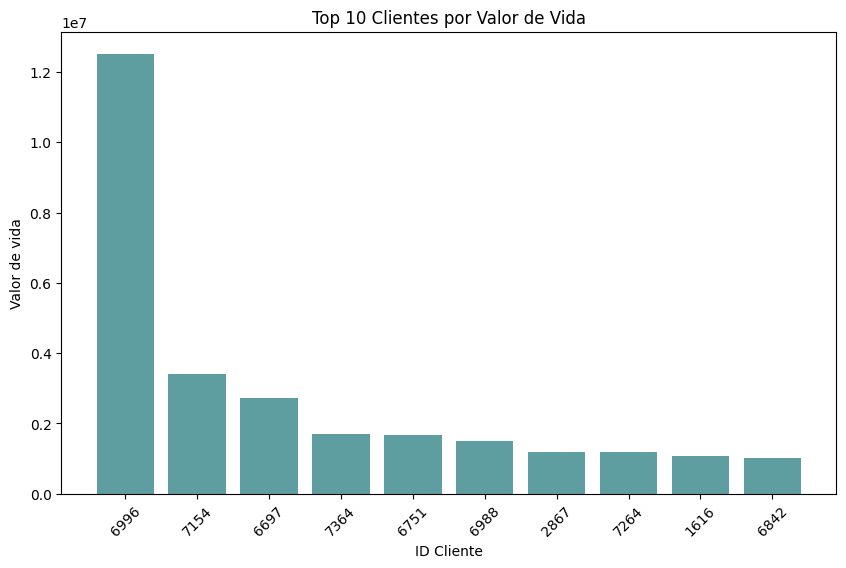

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_clientes.index.astype(str), top_clientes.values, color='cadetblue') # Use .index and .values

# Añadir título y etiquetas de ejes
plt.title('Top 10 Clientes por Valor de Vida') # Changed title to reflect the data
plt.xlabel('ID Cliente')
plt.ylabel('Valor de vida')

plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()

Las propiedades que deben de tener las cadenas de Markov para que convergan son:


*   Irreducibilidad.
\n Se debe de poder acceder a cualquier estado partiendo de otro, en otras palabras, debe de existir una secuencia de pasos finita que nos permita pasar de un estado a otro.
*   Aperiodicidad.
\n Ningún estado debe de tener un periodo mayor a uno
*   Positividad
\n Todas las entradas deben de ser estrictamente positivas, es decir, no puede existir una probabilidad nula de pasar de cualquier estado a otro.
  



# Estadísticas de cada variable

Primero, creamos un diccionario con cada variable analizada

In [ ]:
fechas_cleaned = fechas.drop_duplicates(subset='material', keep='first')
fechas_cleaned = fechas_cleaned.reset_index(drop=True)
fechas_cleaned.head(10)

valor_cliente2 = pd.DataFrame(valor_cliente)
valor_cliente2

variable_dict = {}

variable_dict[0] = df["ventas"]
variable_dict[1]= ventastot["ventas totales"]
variable_dict[2]= fechas_cleaned["ventas"]
variable_dict[3]= productos_nuevos["ventas en fecha más reciente"]
variable_dict[4]=productos_antiguos["ventas en fecha más reciente"]
variable_dict[5]=valor_cliente2[0]

for i in range (len(variable_dict)):
  for j in range (len(variable_dict[i])):
          # Example
      variable_dict[i] = variable_dict[i].copy()  # If you need to make a copy and modify it
      variable_dict[i].iloc[j] = float(variable_dict[i].iloc[j])


Después, creamos un dataframe con cada estadístico relevante

In [ ]:
from scipy.stats import skew
import statistics
import numpy as np
import scipy.stats as ss
estadisticasvariable=[]

for i in range (6):
    mean= sum(variable_dict[i])/len(variable_dict[i])
    quartiles= statistics.quantiles(variable_dict[i], n=4)
    quartiles = [round(q, 2) for q in quartiles]
    mode= statistics.mode(variable_dict[i])
    variance=statistics.variance(variable_dict[i])
    standarddev=statistics.stdev(variable_dict[i])
    rango=max(variable_dict[i])-min(variable_dict[i])
    rangoquartiles=[np.percentile(variable_dict[i], 25),np.percentile(variable_dict[i], 50),np.percentile(variable_dict[i], 75)]
    rangoquartiles = [round(q, 2) for q in rangoquartiles]
    skewness=variable_dict[i].skew()
    cv=np.std(variable_dict[i], ddof=1) / np.mean(variable_dict[i]*100)
    kurtosis=variable_dict[i].kurtosis()

    estadisticastemp=[str(round(mean,2)),quartiles,round(mode,2),round(variance,2),round(standarddev,2),round(rango,2),rangoquartiles,round(skewness,2),round(cv,2),round(kurtosis,2)]
    estadisticasvariable.append(estadisticastemp)

estadisticasnumericas = pd.DataFrame(
{"Ventas sin modificar" : estadisticasvariable[0],
"Ventas totales de cada material" : estadisticasvariable[1],
"Ventas más recientes de cada material" : estadisticasvariable[2],
"Ventas realizadas después de 2023" : estadisticasvariable[3],
"Ventas realizadas antes de 2022" : estadisticasvariable[4],
"Valores de vida por cliente" : estadisticasvariable[5]},
index = ["Media", "Cuartiles", "Moda" , "Varianza","Desviación Estandar","Rango","Rango intercuartil", "Coeficiente de Asimetría",
         "Coeficiente de Variación", "Curtosis"])

estadisticasnumericas = estadisticasnumericas.style.set_caption("Datos")

display(estadisticasnumericas)


,Ventas sin modificar,Ventas totales de cada material,Ventas más recientes de cada material,Ventas realizadas después de 2023,Ventas realizadas antes de 2022,Valores de vida por cliente
Media,11050.34,4233951.19,7945.71,8319.44,1901.17,405515.85
Cuartiles,"[1692.5, 4092.6, 9767.52]","[42653.3, 268979.73, 1591630.52]","[996.8, 2877.7, 7784.64]","[1201.45, 3332.9, 8182.54]","[464.93, 1107.16, 6151.05]","[62390.28, 162812.47, 437444.7]"
Moda,6105.600000,0.000000,8524.800000,8524.800000,78112.350000,100764.400000
Varianza,1601676832.280000,317817944950755.062500,395484989.040000,292485536.560000,1042861839.500000,1150377776830.090088
Desviación Estandar,40020.950000,17827449.200000,19886.800000,17102.210000,32293.370000,1072556.650000
Rango,5999515.140000,195885587.240000,379056.000000,222655.000000,259368.350000,12521694.870000
Rango intercuartil,"[1692.5, 4092.6, 9766.76]","[42910.03, 268979.73, 1583517.86]","[997.9, 2877.7, 7782.48]","[1210.46, 3332.9, 8152.51]","[512.92, 1107.16, 5730.15]","[62748.43, 162812.47, 432877.27]"
Coeficiente de Asimetría,17.770000,7.660000,3.110000,5.720000,-3.990000,9.530000
Coeficiente de Variación,0.040000,0.040000,0.030000,0.020000,0.170000,0.030000
Curtosis,926.650000,65.780000,47.520000,48.150000,25.500000,105.330000


# Probabilidades

Estadísticas de los materiales con mayores ventas por criterio

In [ ]:
FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventastot["material"].iloc[0]
winner[1]=fechas["material"].iloc[0]
winner[2]=ventastotN["material"].iloc[0]
winner[3]=top_productos_nuevos["material"].iloc[0]
winner[4]=top_productos_antiguos["material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=winner[i]
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['material'].tolist() and material not in ventasporfecha2['material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con más ventas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con más ventas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con más ventas,SOLUCION CS C/1000ML FLX SI,SOLUCION DX-50 PiSA MINIOVAL 50ML NVO,SOLUCION DX-10 C/1000ML FLX SI,FENODID 0.5MG/10ML C/6AMP SI PI,ISAVIR 400MG C/35TAB
Número de transiciónes de Activado a Activado,1068,42,342,0,0
Número de transiciónes de Activado a Desactivado,70,120,285,6,4
Número de transiciónes de Desactivado a Activado,70,119,284,5,3
Número de transiciónes de Desactivado a Desactivado,15,933,312,913,1140
Número total de Activaciones,1138,162,627,6,4
Número total de Desactivaciones,85,1052,596,918,1143
Prob. de transiciónes de Activado a Activado,93.8489%,25.9259%,54.5455%,0%,0%
Prob. de transiciónes de Activado a Desactivado,6.1511%,74.0741%,45.4545%,100.0%,100.0%
Prob. de transiciónes de Desactivado a Activado,82.3529%,11.3118%,47.651%,0.5447%,0.2625%


Estadísticas de los materiales con mayores perdidas por criterio

In [ ]:
ventastot["material"].iloc[-1]

In [ ]:
winner={}
winner[0]=bottom_10_ventas_df["material"].iloc[0]
winner[1]=fechasper["material"].iloc[0]
winner[2]=ventastotNPer["material"].iloc[0]
winner[3]=top_productos_nuevosper["material"].iloc[0]
winner[4]=top_productos_antiguosPer["material"].iloc[0]
winner[5]=top_clientes.index[-1]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=winner[i]
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['material'].tolist() and material not in ventasporfecha2['material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con mayores pérdidas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con mayores pérdidas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con mayores pérdidas,MAGNEFUSIN 10% C/10ML 100AMPP SI TLJ,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,CLORHEXI-RUB 0.5% DESECHABLE C/750ML,EXETIN-A 2000UI D/1ML C/6FAMP SI,CLORHEXI-RUB 0.5% DESECHABLE C/750ML
Número de transiciónes de Activado a Activado,456,143,0,10,0
Número de transiciónes de Activado a Desactivado,258,251,4,88,4
Número de transiciónes de Desactivado a Activado,257,250,3,87,3
Número de transiciónes de Desactivado a Desactivado,252,579,738,1032,738
Número total de Activaciones,714,394,4,98,4
Número total de Desactivaciones,509,829,741,1119,741
Prob. de transiciónes de Activado a Activado,63.8655%,36.2944%,0%,10.2041%,0%
Prob. de transiciónes de Activado a Desactivado,36.1345%,63.7056%,100.0%,89.7959%,100.0%
Prob. de transiciónes de Desactivado a Activado,50.4912%,30.1568%,0.4049%,7.7748%,0.4049%


Estadísticas de los materiales con menores ventas por criterio

In [ ]:

FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventasbajas["material"].iloc[0]
winner[1]=fechasmen["material"].iloc[0]
winner[2]=ventastotNMen["material"].iloc[0]
winner[3]=top_productos_nuevos["material"].iloc[0]
winner[4]=productos_nuevosmen["material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

for i in range (6):
  P0=0
  P1=0
  P00=0
  P01=0
  P10=0
  P11=0
  material=winner[i]
  PrincipioVentas=False
  for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['material'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P00 += 1
              P0+=1
          elif material in ventasporfecha['material'].tolist() and material not in ventasporfecha2['material'].tolist():
              P01 += 1
              P0+=1
          elif material not in ventasporfecha['material'].tolist() and material in ventasporfecha2['material'].tolist():
              P10 += 1
              P1+=1
          else:
              P11 += 1
              P1+=1

  P0=P00+P01
  P1=P10+P11
  if P00 != 0:
      totP00=P00/P0
  else:
      totP00=0
  if P01 != 0:
        totP01=P01/P0
  else:
      totP01=0
  if P10 != 0:
        totP10=P10/P1
  else:
      totP10=0
  if P11 != 0:
        totP11=P11/P1
  else:
      toptP11=0
  estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
  estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"De acuerdo a ventas totales" : estadisticasvariable[0],
"De acuerdo a la producción más reciente (2024-08-07)" : estadisticasvariable[1],
"De acuerdo a la producción más reciente de cada producto" : estadisticasvariable[2],
"De acuerdo a producciones en el año 2023 y posterior" : estadisticasvariable[3],
"De acuerdo a producciones antes de 2022" : estadisticasvariable[4]},
index = ["ID del material con menos ventas",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])

estadisticasgganadores = estadisticasgganadores.style.set_caption("Transiciones del producto con menos ventas")

display(estadisticasgganadores)

,De acuerdo a ventas totales,De acuerdo a la producción más reciente (2024-08-07),De acuerdo a la producción más reciente de cada producto,De acuerdo a producciones en el año 2023 y posterior,De acuerdo a producciones antes de 2022
ID del material con menos ventas,PINADRINA 1MG/ML C/1ML 50AMP SI,MEPRIZINA 500MG D/2ML C/1FAMP SI TLJ,ELECTROLIT PED MANZANA C/500ML 1FCO SOOR,FENODID 0.5MG/10ML C/6AMP SI PI,FLEBOTEK P/MEDIR PVC
Número de transiciónes de Activado a Activado,681,143,1,0,4
Número de transiciónes de Activado a Desactivado,219,251,27,6,61
Número de transiciónes de Desactivado a Activado,218,250,26,5,60
Número de transiciónes de Desactivado a Desactivado,105,579,1014,913,1096
Número total de Activaciones,900,394,28,6,65
Número total de Desactivaciones,323,829,1040,918,1156
Prob. de transiciónes de Activado a Activado,75.6667%,36.2944%,3.5714%,0%,6.1538%
Prob. de transiciónes de Activado a Desactivado,24.3333%,63.7056%,96.4286%,100.0%,93.8462%
Prob. de transiciónes de Desactivado a Activado,67.4923%,30.1568%,2.5%,0.5447%,5.1903%


Estadísticas del cliente con mayor valor de vida

In [ ]:
FechasUnicas = df["fecha"].drop_duplicates().reset_index(drop=True)

winner={}
winner[0]=ventastot["material"].iloc[0]
winner[1]=fechas["material"].iloc[0]
winner[2]=ventastotN["material"].iloc[0]
winner[3]=top_productos_nuevos["material"].iloc[0]
winner[4]=top_productos_antiguos["material"].iloc[0]
winner[5]=top_clientes.index[0]

estadisticasvariable=[]

P0=0
P1=1
P00=0
P01=0
P10=0
P11=0
material=float(winner[5])
PrincipioVentas=False
for j in range(len(FechasUnicas) - 1):
        ventasporfecha = df[df['fecha'] == FechasUnicas[j]]
        ventasporfecha2 = df[df['fecha'] == FechasUnicas[j + 1]]
        if material in ventasporfecha['id_cliente'].tolist():
          PrincipioVentas=True
        if PrincipioVentas==True:
          if material in ventasporfecha['id_cliente'].tolist() and material in ventasporfecha2['id_cliente'].tolist():
              P00 += 1
              P0 +=1
          elif material in ventasporfecha['id_cliente'].tolist() and material not in ventasporfecha2['id_cliente'].tolist():
              P01 += 1
              P0 +=1
          elif material not in ventasporfecha['id_cliente'].tolist() and material in ventasporfecha2['id_cliente'].tolist():
              P10 += 1
              P1 +=1
          else:
              P11 += 1
              P1 +=1

P0=P00+P01
P1=P10+P11
if P00 != 0:
    totP00=P00/P0
else:
    totP00=0
if P01 != 0:
      totP01=P01/P0
else:
    totP01=0
if P10 != 0:
      totP10=P10/P1
else:
    totP10=0
if P11 != 0:
      totP11=P11/P1
else:
    toptP11=0
estadisticastemp=[winner[i],P00, P01, P10, P11, P0, P1, str(round(totP00*100,4))+"%", str(round(totP01*100,4))+"%", str(round(totP10*100,4))+"%", str(round(totP11*100,4))+"%"]
estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"Transiciones del cliente con más ventas" : estadisticasvariable[0]},
index = ["ID del material ganador",
         "Número de transiciónes de Activado a Activado", "Número de transiciónes de Activado a Desactivado" ,
         "Número de transiciónes de Desactivado a Activado","Número de transiciónes de Desactivado a Desactivado",
         "Número total de Activaciones",
         "Número total de Desactivaciones",
         "Prob. de transiciónes de Activado a Activado","Prob. de transiciónes de Activado a Desactivado",
         "Prob. de transiciónes de Desactivado a Activado", "Prob. de transiciónes de Desactivado a Desactivado"])
display(estadisticasgganadores)

,Transiciones del cliente con más ventas
ID del material ganador,6996
Número de transiciónes de Activado a Activado,531
Número de transiciónes de Activado a Desactivado,258
Número de transiciónes de Desactivado a Activado,257
Número de transiciónes de Desactivado a Desactivado,177
Número total de Activaciones,789
Número total de Desactivaciones,434
Prob. de transiciónes de Activado a Activado,67.3004%
Prob. de transiciónes de Activado a Desactivado,32.6996%
Prob. de transiciónes de Desactivado a Activado,59.2166%


Estadísticas del cliente con mayor valor de vida

In [ ]:


estadisticasvariable=[]
ganancias=0
perdidas=0
ventasganador=ventasganador=df[df['id_cliente'] == winner[5]]["ventas"]
for j in range (len(ventasganador)):
    if ventasganador.iloc[j]>0:
      ganancias+=1
    else:
      perdidas+=1
probganancias=ganancias/len(ventasganador)
probperdidas=perdidas/len(ventasganador)
estadisticastemp=[winner[i],ganancias, perdidas, str(round(probganancias*100,4))+"%", str(round(probperdidas*100,4))+"%",
                    str(round(probganancias*probganancias*100,4))+"%", str(round(probganancias*probperdidas*100,4))+"%",
                    str(round(probperdidas*probganancias*100,4))+"%", str(round(probperdidas*probperdidas*100,4))+"%"]
estadisticasvariable.append(estadisticastemp)


estadisticasgganadores = pd.DataFrame(
{"Estadísticas del cliente con mayor valor de vida" : estadisticasvariable[0]},
index = ["ID del cliente",
         "Número de ventas con ganancias", "Número de ventas con pérdidas" ,
         "Probabilidad de obtener ganancias","Probabilidad de obtener pérdidas",
         "Prob. ganar y después ganar","Prob. ganar y después perder",
         "Prob. perder y después ganar", "Prob. perder y después perder"])

display(estadisticasgganadores)


,Estadísticas del cliente con mayor valor de vida
ID del cliente,6996
Número de ventas con ganancias,9602
Número de ventas con pérdidas,681
Probabilidad de obtener ganancias,93.3774%
Probabilidad de obtener pérdidas,6.6226%
Prob. ganar y después ganar,87.1934%
Prob. ganar y después perder,6.184%
Prob. perder y después ganar,6.184%
Prob. perder y después perder,0.4386%
